In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('Position_Salaries.csv')

In [11]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [12]:
X = df.iloc[:, 1:2].values
y = df.iloc[:, 2].values

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
sc_X = StandardScaler()
sc_y = StandardScaler()

In [18]:
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1, 1))

In [19]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X, y)

# Predicting a new result with SVR
y_pred = sc_y.inverse_transform(
    regressor.predict(
        sc_X.transform(
            np.array([[6.5]])
        )
    )
)

/home/sudhanva/anaconda3/envs/tf114gpu/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


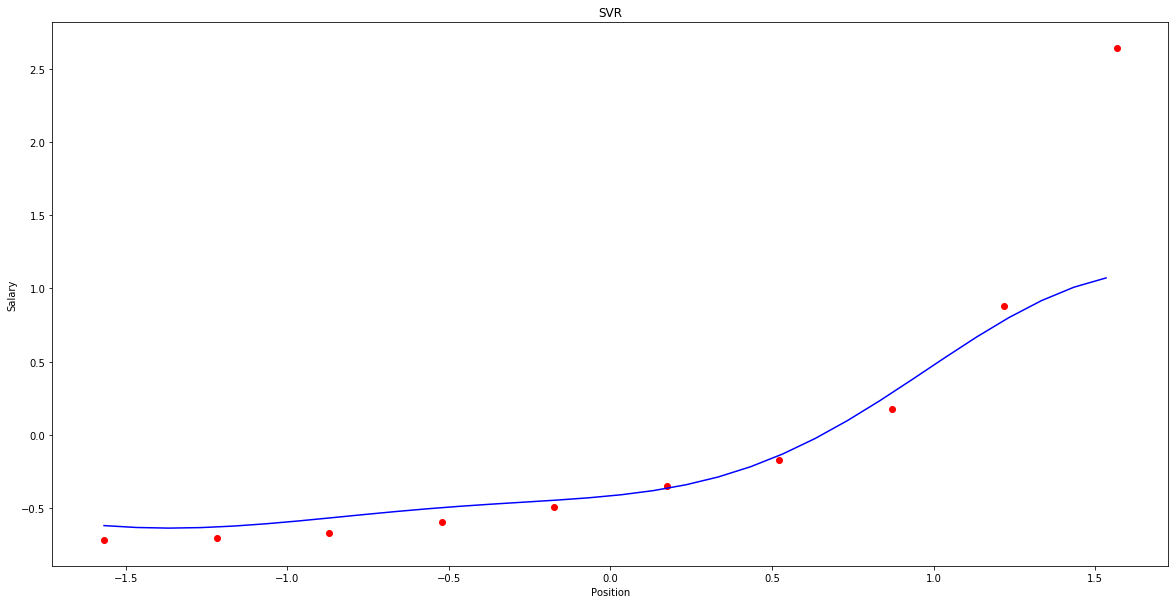

In [22]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.figure(figsize=(20, 10))
plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title('SVR')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()